# Analyzing the Stroop Effect

**Author: Savahnna L Cunningham**

**Date: September 14, 2017**

## Background Information

In a Stroop experiment, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally sized lists. Each participant will go through and record a time from each condition.

## 1. 

#### What is the independent variable? 

The independent variable in this experiment is whether the word name and font color were the same or different.

#### What is the dependent variable?

The dependent variable is the reaction time (RT) of the participant to name the font color of the word. 

## 2.  
#### What kind of statistical test do you expect to perform? Justify your choices.

The participants are asked to perform the tasks under both the congruent word condition and the incongruent word condition which means the same participant is exposed to two conditions and tested for each, therefore meeting the criteria for a "repeated-measures" statistical test [2&3]. Assuming that the population data has a normal distribution, I expect to perform a Paired T-Test, which is carried out when you are collecting data twice from the same group, person, item or thing [5]. I will also use a t-score to test the Null Hypothesis because my sample size is below 30 and has an unknown population standard deviation.


#### What is an appropriate set of hypotheses for this task?

Ho (Null Hypothesis): Mean reaction time for the congruent sample will be greater than or equal to the mean reaction time for the incongruent sample. 

Ha (Alternate Hypothesis): Mean of the congruent reaction time will be less than the mean incongruent reaction time sample.

                H0: μC ≥ μI

                HA: μC < μI      where μC = congruent sample and μI = incongruent sample


## 3. 
Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [220]:
train = pd.read_csv('stroopdata.csv')

In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [222]:
#import data set
print("\n")
print("Stroop Data Descriptive Statistics")
train.describe()



Stroop Data Descriptive Statistics


,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Note: The mean average in the summary table refers to the sample mean, which is different than the hypothetical average μ.

In [225]:
# Parse csv into pandas data structures
congruent_data = train["Congruent"]
incongruent_data = train["Incongruent"]

# Create a Series for the difference between the conditions
train["Difference"] = train["Congruent"] - train["Incongruent"]

print("\n")
print ("Stroop Data Descriptive Statistics")
print("\n")
print (train.describe())
print("\n")



Stroop Data Descriptive Statistics


       Congruent  Incongruent  Difference
count  24.000000    24.000000   24.000000
mean   14.051125    22.015917   -7.964792
std     3.559358     4.797057    4.864827
min     8.630000    15.687000  -21.919000
25%    11.895250    18.716750  -10.258500
50%    14.356500    21.017500   -7.666500
75%    16.200750    24.051500   -3.645500
max    22.328000    35.255000   -1.950000




In [227]:
# Calculations for a sample t-value[7] 
tvalueResults = stats.ttest_rel(incongruent_data, congruent_data)
tstat = tvalueResults[0]
pvalue = tvalueResults[1]
print ("t-value = " + '%.2f' % tstat) 
print ("p-value = " + '%.8f' % pvalue) 

t-value = 8.02
p-value = 0.00000004


## 4.
Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

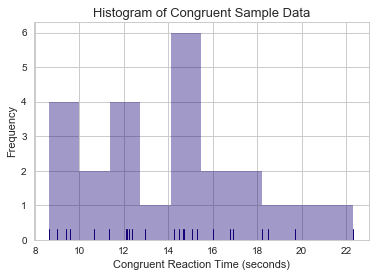

In [228]:
#Distribution Congruent Data
sns.set_style('whitegrid')
g = sns.distplot(train['Congruent'],rug=True,color="#160177",bins=10,kde=False)
g.axes.set_title('Histogram of Congruent Sample Data', fontsize=13)
plt.xlabel("Congruent Reaction Time (seconds)")
plt.ylabel("Frequency")

Visualization of the relatively normal distribution of the congruent reaction times. As you can see most participants completed the test in ~15 seconds.

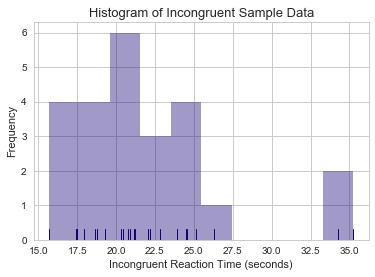

In [215]:
sns.set_style('whitegrid')
g = sns.distplot(train['Incongruent'],rug=True,color="#160177",bins=10,kde=False)
g.axes.set_title('Histogram of Incongruent Sample Data', fontsize=13)
plt.xlabel("Incongruent Reaction Time (seconds)")
plt.ylabel("Frequency")

Visualization of the right skewed distribution of the incongruent reaction times. As you can see from the graph, the majority of participants completed the test between 17.5-21 seconds with some outliers completing the test in ~35 seconds.

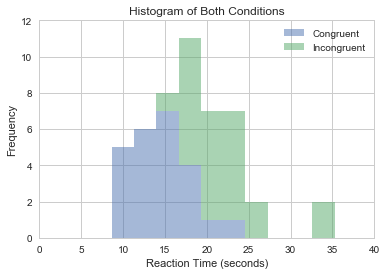

In [239]:
df = pd.read_csv('stroopdata.csv')

#Histogram graph of the 2 conditions superimposed on the same graph
title = 'Histogram of Both Conditions'
g = df.plot(title=title, kind='hist', alpha= 0.5, bins=10,stacked=True)
plt.xlabel('Reaction Time (seconds)')
size = plt.axis([0,40,0,12])

Histogram of the participants’ reactions times; notice the difference in reaction times between the incongruent and congruent conditions. From the visualization it appears to take the participants ~5 seconds longer to complete the incongruent test.

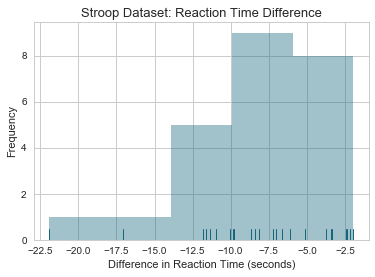

In [217]:
#histograph of the reaction time difference between the conditions
sns.distplot(train['Difference'],rug=True,color="#16677c",kde=False)
plt.xlabel("Difference in Reaction Time (seconds)")
plt.ylabel("Frequency")
plt.title("Stroop Dataset: Reaction Time Difference",fontsize=13)

Visualization of the reaction time difference between the two conditions. 

## 5. 
Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Confidence Interval = 95%**

**α = .05**

**degrees of freedom = 23**

**one-tailed critical statistic value = 1.714**

**calculated t-value = 8.02**
 
**p-value = 0.00000004** 

### Results

A paired t-test was run on a sample of 24 participants to determine whether there was a statistically significant mean difference between the reaction time between the congruent vs. incongruent condition. Typically it takes participants longer to say the ink colors (22.02 ± 4.8 sec) than it does to read the words (14.05 ± 3.56 sec). At the 95% confidence level (α = .05) and 23 degrees of freedom, the critical statistic value for a one-tailed test is 1.714. The calculated t-value for the difference between the congruent and incongruent conditions is 8.02. The calculated t-value is greater than the critical t-value (t-table value). Additionally, the p-value is less than the alpha level: p < .05; therefore, the null hypothesis is rejected. Concluding there is sufficient evidence at the 95% Confidence Interval to support the alternate hypothesis that states it takes less time to read the word out loud than it does to say the color of ink the word is printed. 

In summary, the Stroop Experiment along with other studies show the reason for the reaction time delay is due to interfering signals in your brain that are completing for your attention.  Color is processed in an area of the brain called the Ventral Stream while active reading is processed in the Occipital and Temporal Lobes. Your attention filter cannot dampen your brain's instinct to read the word itself, thus making it difficult to name the font color [4].


### References

1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning: With applications in R.

2. https://cyfar.org/types-statistical-tests

3. https://statistics.laerd.com/stata-tutorials/paired-t-test-using-stata.php

4. https://youtu.be/UAKAlP1B5WY

5. http://www.statisticshowto.com/probability-and-statistics

6. http://davidmlane.com/hyperstat/t_table.html

7. https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html

8. https://pandas.pydata.org/pandas-docs/stable/visualization.html